# HR Analytics Project- Understanding the Attrition in HR


Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Columns Analysis 

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [7]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [8]:
df.Education.unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [9]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
df.EmployeeCount.unique()

array([1], dtype=int64)

In [11]:
df.EmployeeNumber.nunique()

1470

In [12]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df.JobInvolvement.unique()

array([3, 2, 4, 1], dtype=int64)

In [15]:
df.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [16]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [17]:
df.JobSatisfaction.unique()


array([4, 2, 3, 1], dtype=int64)

In [18]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [19]:
df.MonthlyIncome.nunique()

1349

In [20]:
df.MonthlyRate.nunique()

1427

In [21]:
df.Over18.nunique()

1

In [22]:
df.PercentSalaryHike.nunique()


15

In [23]:
df.PerformanceRating.unique()

array([3, 4], dtype=int64)

In [24]:
df.RelationshipSatisfaction.unique()


array([1, 4, 2, 3], dtype=int64)

In [25]:
df.StandardHours.nunique()


1

In [26]:
df.StockOptionLevel.unique()


array([0, 1, 3, 2], dtype=int64)

In [27]:
df.TrainingTimesLastYear.unique()


array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [28]:
df.TotalWorkingYears.unique()


array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [29]:
df.WorkLifeBalance.unique()


array([1, 3, 2, 4], dtype=int64)

Age - depicts the age of the employee 

Attrition -Target variable which says whether the emplpoyee left the company or not


BusinessTravel - Tells whether the employee has travelled with different values (*'Travel_Rarely', 'Travel_Frequently', 'Non-Travel')

DailyRate - Daily wage

Department   - ('Sales', 'Research & Development', 'Human Resources') 

DistanceFromHome   - Distance between the company and their home

Education - value converted to 1,2,3,4,5

EducationField - Different fields'Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resource'

EmployeeCount - is always 1 can remove this 

EmployeeNumber - its unique no for all employees 

EnvironmentSatisfaction -value converted to 1,2,3,4,5

Gender    - two values female and male 

HourlyRate  - hourly wages

JobInvolvement- valuated from 1 to 5

JobLevel  - valuated from 1 to 5

JobRole   - 9 unique job roles are there 'Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'

JobSatisfaction - valuated from 1 to 5 

MaritalStatus - has three unique values -'Single', 'Married', 'Divorced'

MonthlyIncome  - different values for different people

MonthlyRate - different values for different people

NumCompaniesWorked - Number of companies they worked for before joinging IBM

Over18  - All are above 18 this needs to be removed

PercentSalaryHike - 15 differen values

PerformanceRating  - Only two values 3 and 4

RelationshipSatisfaction  - has 4 different values 1,2,3,4

StandardHours - all are having 8 hours as the value this can be avoided 

StockOptionLevel  - 4 different values 0,1,2,3

TotalWorkingYears   - no of years worked by the employee 

TrainingTimesLastYear - valuated from 0 to 6

WorkLifeBalance   - is valuated from 1 to 4 

YearsAtCompany    - years employee worked for IBM

YearsInCurrentRole - years employee worked in the role

YearsSinceLastPromotion - years passed since their last promotion.

YearsWithCurrManager  - years employee worked with the company


# Data Preparation 

In [30]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

there are no nan values is any column

In [31]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Eliminating the columns that contribute no values 

'EmployeeCount', 'Over18', 'StandardHours' have only single values which doesnt contribute to prediction

In [32]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [33]:
df.shape

(1470, 32)

Employee no is the unique value we dont need this for prediction we can drop this as well 

In [34]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

In [35]:
df.shape

(1470, 31)

'DailyRate', 'HourlyRate', 'MonthlyRate'] all these correspond to salary hence we can drop these values for now

In [36]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [37]:
df.shape

(1470, 28)

# Binarize Gender, OverTime and Attrition

In [38]:

from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Gender'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
 
df['Gender'].unique()

array([0, 1])

In [39]:
# Encode labels in column 'Gender'.
df['OverTime']= label_encoder.fit_transform(df['OverTime'])
 
df['OverTime'].unique()

array([1, 0])

In [40]:
# Encode labels in column 'Gender'.
df['Attrition']= label_encoder.fit_transform(df['Attrition'])
 
df['Attrition'].unique()

array([1, 0])

In [41]:
df.shape

(1470, 28)

In [42]:
df.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                       int32
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                     int32
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

# EDA- Exploratory Data Analysis 

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [44]:
df1.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

Now all the columns are in same dtype

Analysing the Target variable first 

<AxesSubplot:xlabel='Attrition', ylabel='count'>

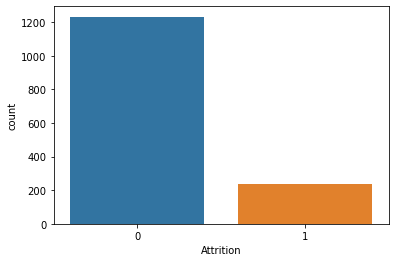

In [45]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.countplot(df1['Attrition'])

The Attrition has only two values hence this is a Classification problem 

In [46]:
df1['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Since there is a Huge difference this is a class imbalance problem 

# Resampling method

In [47]:
df2=df1
df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,2,0,1,1,1,0,2,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,1,7,0,1,2,1,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,1,1,1,4,3,1,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,1,2,3,1,3,0,2,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,1,1,0,3,0,1,2,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,1,22,1,3,2,1,3,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,1,5,0,3,3,1,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,1,3,2,1,1,1,3,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,2,1,2,3,3,1,1,...,0,3,0,17,3,1,9,6,0,8


In [48]:
# class count
Attrition_count_0, Attrition_count_1 = df2['Attrition'].value_counts()
print('Attrition_count_0, :',Attrition_count_0, '\n Attrition_count_1 : ', Attrition_count_1)

Attrition_count_0, : 1233 
 Attrition_count_1 :  237


In [49]:
# Separate class
Attrition_0 = df2[df2['Attrition'] == 0]
Attrition_1 = df2[df2['Attrition'] == 1]# print the shape of the class
print('Attrition 0:', Attrition_0.shape)
print('Attrition 1:', Attrition_1.shape)

Attrition 0: (1233, 28)
Attrition 1: (237, 28)


In [50]:
Attrition_1_over = Attrition_1.sample(Attrition_count_0, replace=True)

df3 = pd.concat([Attrition_1_over, Attrition_0], axis=0)

print("total class of 1 and 0: \n",df3['Attrition'].value_counts())

total class of 1 and 0: 
 1    1233
0    1233
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

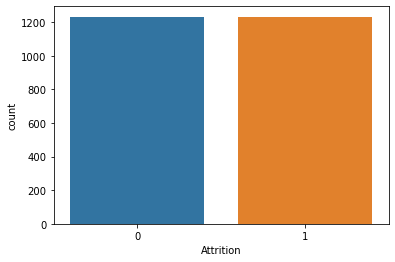

In [51]:
sns.countplot(df3['Attrition'])

Class imbalance issue is solved

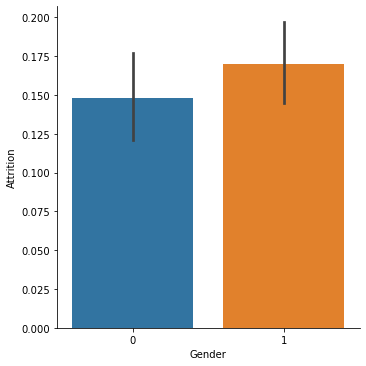

In [52]:
sns.factorplot(x = 'Gender', y='Attrition', kind = 'bar', data=df)

We see that males are more likely to resign when compared to females

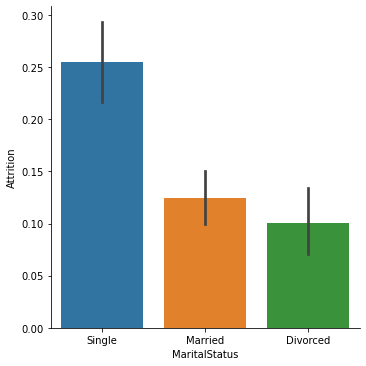

In [53]:
sns.factorplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

We see that singles are more likely to resign

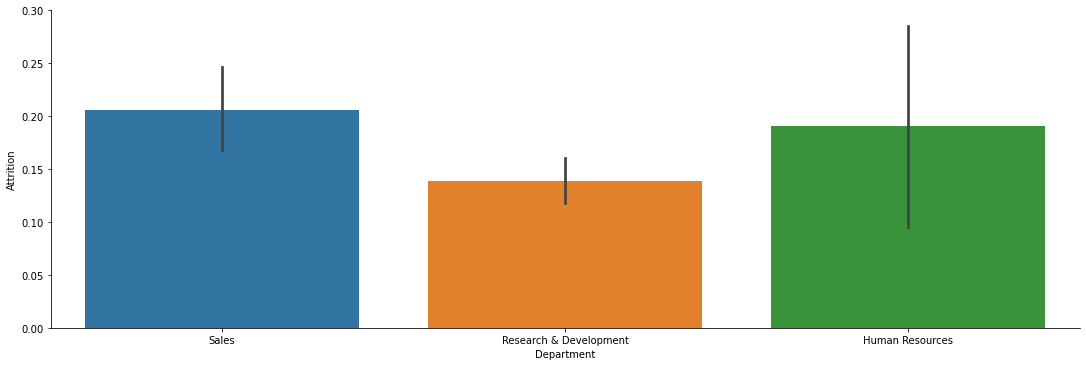

In [54]:
sns.factorplot(x = 'Department', y='Attrition', kind = 'bar', data=df, aspect = 3)

Sales department and Human resources department are having higher attrition rate compared to 
research and development department.

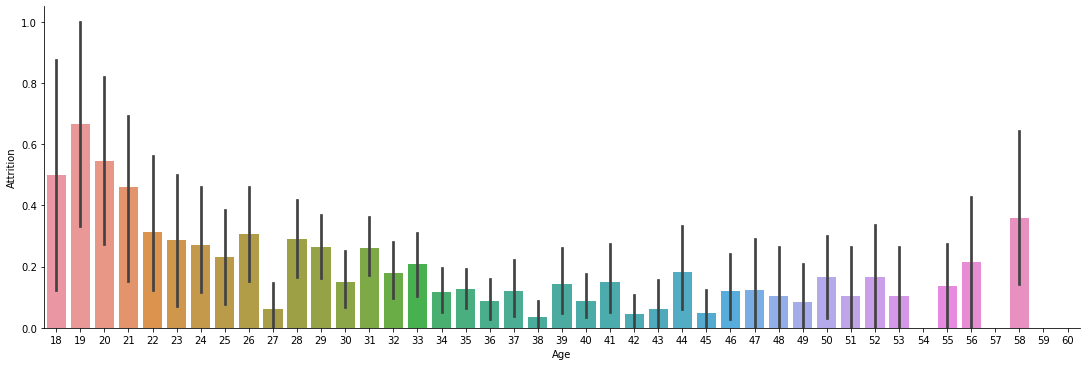

In [55]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)


Lesser the age higher the attrition 

# BiVariate Analysis


In [56]:
df3.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [57]:
df3.shape

(2466, 28)

# Distplot to find whether the columns are normally distributed or not

<AxesSubplot:xlabel='Age', ylabel='Density'>

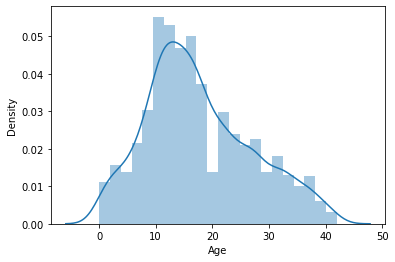

In [58]:
sns.distplot(df3['Age'])


<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

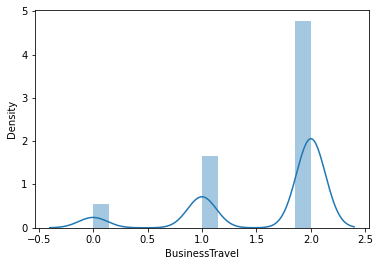

In [59]:
sns.distplot(df3['BusinessTravel'])

<AxesSubplot:xlabel='Department', ylabel='Density'>

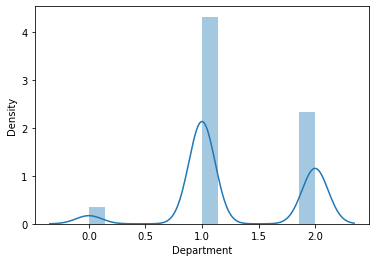

In [60]:
sns.distplot(df3['Department'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

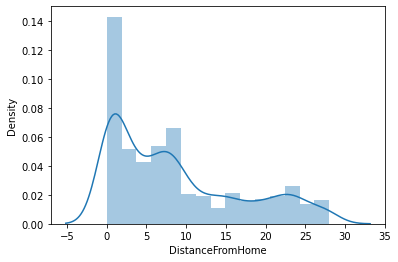

In [61]:
sns.distplot(df3['DistanceFromHome'])


<AxesSubplot:xlabel='Education', ylabel='Density'>

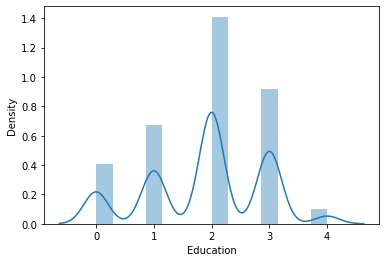

In [62]:
sns.distplot(df3['Education'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

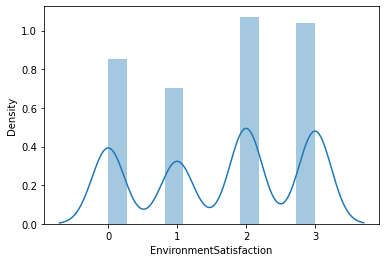

In [63]:

sns.distplot(df3['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

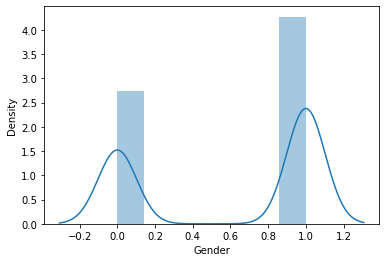

In [64]:

sns.distplot(df3['Gender'])


<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

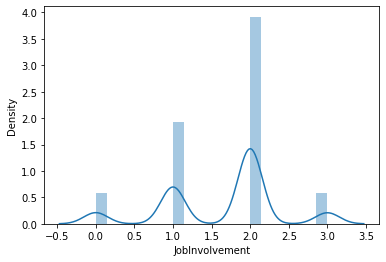

In [65]:
sns.distplot(df3['JobInvolvement'])


<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

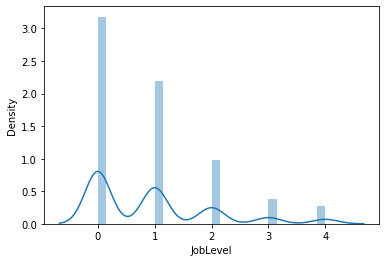

In [66]:
sns.distplot(df3['JobLevel'])

<AxesSubplot:xlabel='JobRole', ylabel='Density'>

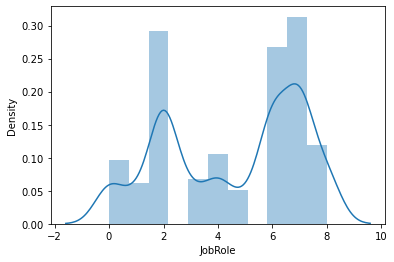

In [67]:
sns.distplot(df3['JobRole'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

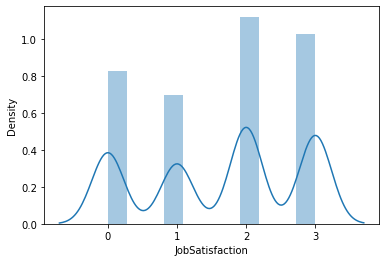

In [68]:
sns.distplot(df3['JobSatisfaction'])


<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

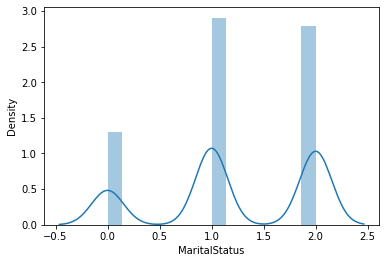

In [69]:
sns.distplot(df3['MaritalStatus'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

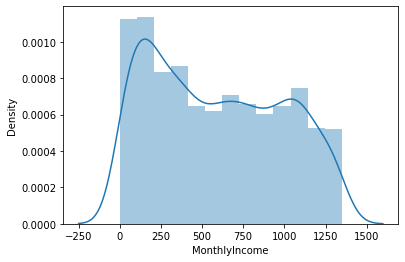

In [70]:
sns.distplot(df3['MonthlyIncome'])


<AxesSubplot:xlabel='OverTime', ylabel='Density'>

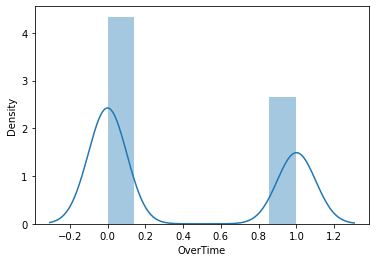

In [71]:
sns.distplot(df3['OverTime'])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

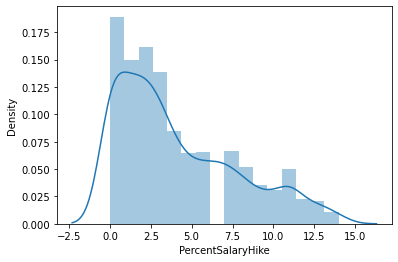

In [72]:
sns.distplot(df3['PercentSalaryHike'])

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

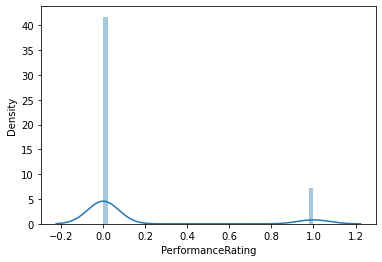

In [73]:
sns.distplot(df3['PerformanceRating'])


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

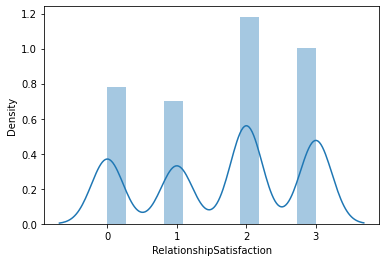

In [74]:
sns.distplot(df3['RelationshipSatisfaction'])


<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

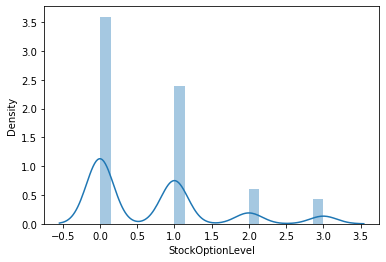

In [75]:
sns.distplot(df3['StockOptionLevel'])


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

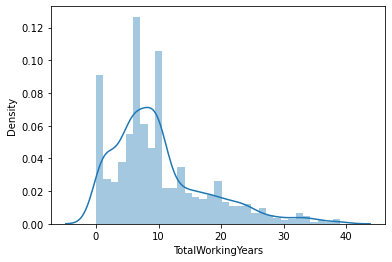

In [76]:
sns.distplot(df3['TotalWorkingYears'])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

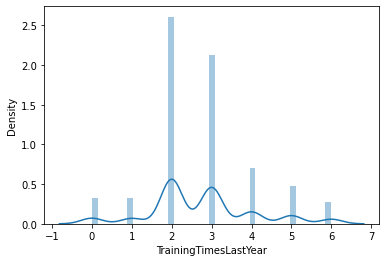

In [77]:
sns.distplot(df3['TrainingTimesLastYear'])


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

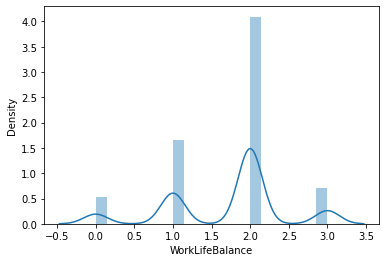

In [78]:
sns.distplot(df3['WorkLifeBalance'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

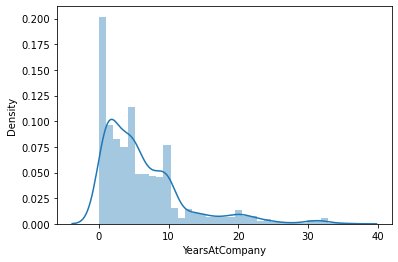

In [79]:
sns.distplot(df3['YearsAtCompany'])


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

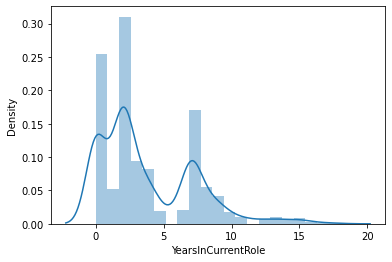

In [80]:
sns.distplot(df3['YearsInCurrentRole'])


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

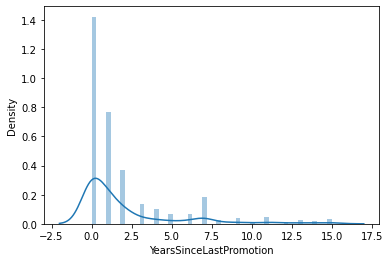

In [81]:
sns.distplot(df3['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

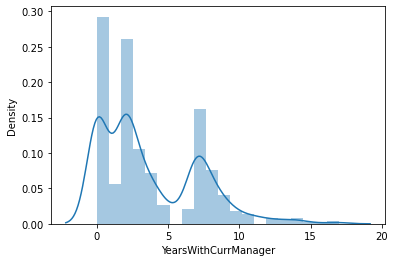

In [82]:
sns.distplot(df3['YearsWithCurrManager'])

All columns are not normally distributed 

# Boxplot to find the skewness in the columns

<AxesSubplot:xlabel='Age'>

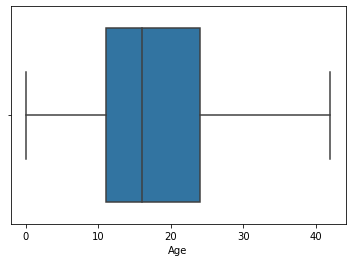

In [83]:
sns.boxplot(df3['Age'])


<AxesSubplot:xlabel='BusinessTravel'>

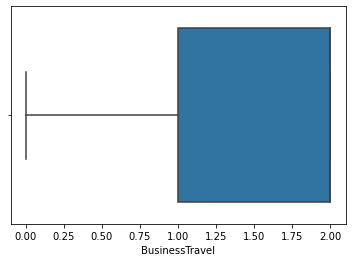

In [84]:
sns.boxplot(df3['BusinessTravel'])


<AxesSubplot:xlabel='Department'>

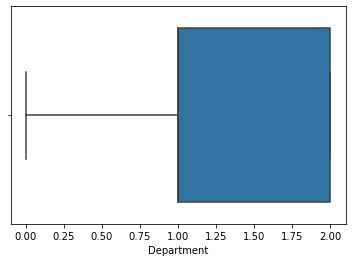

In [85]:
sns.boxplot(df3['Department'])


<AxesSubplot:xlabel='DistanceFromHome'>

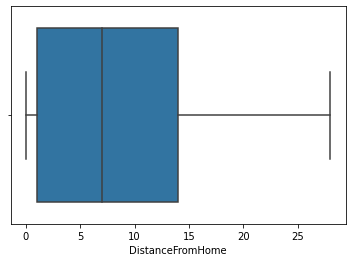

In [86]:
sns.boxplot(df3['DistanceFromHome'])


<AxesSubplot:xlabel='Education'>

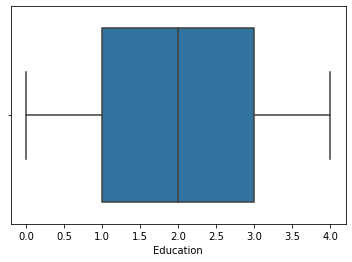

In [87]:
sns.boxplot(df3['Education'])


<AxesSubplot:xlabel='EnvironmentSatisfaction'>

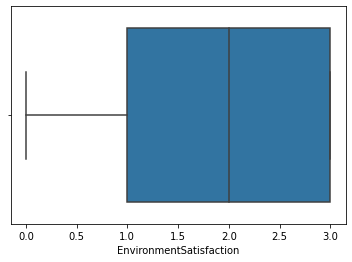

In [88]:
sns.boxplot(df3['EnvironmentSatisfaction'])


<AxesSubplot:xlabel='Gender'>

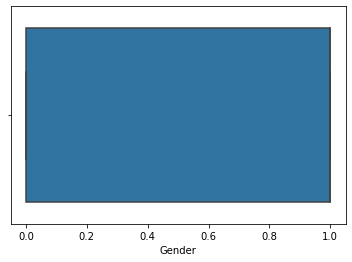

In [89]:
sns.boxplot(df3['Gender'])

<AxesSubplot:xlabel='JobInvolvement'>

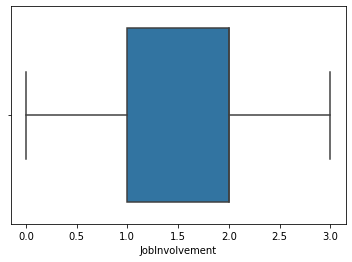

In [90]:
sns.boxplot(df3['JobInvolvement'])


<AxesSubplot:xlabel='JobLevel'>

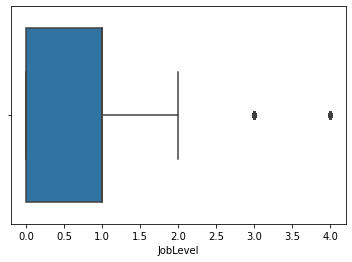

In [91]:
sns.boxplot(df3['JobLevel'])

<AxesSubplot:xlabel='JobRole'>

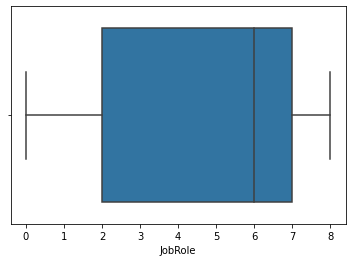

In [92]:
sns.boxplot(df3['JobRole'])

<AxesSubplot:xlabel='JobSatisfaction'>

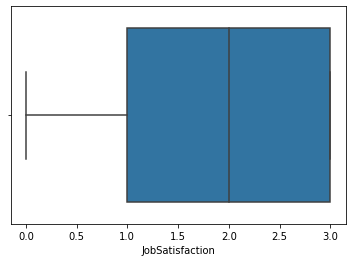

In [93]:
sns.boxplot(df3['JobSatisfaction'])

<AxesSubplot:xlabel='MaritalStatus'>

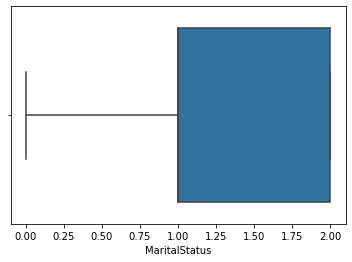

In [94]:
sns.boxplot(df3['MaritalStatus'])


<AxesSubplot:xlabel='MonthlyIncome'>

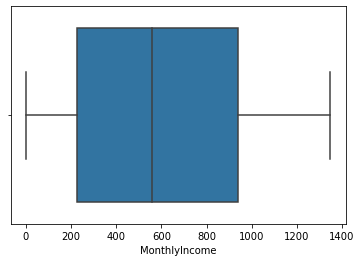

In [95]:
sns.boxplot(df3['MonthlyIncome'])

<AxesSubplot:xlabel='OverTime'>

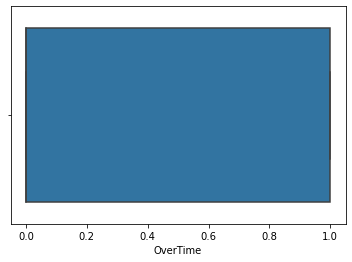

In [96]:
sns.boxplot(df3['OverTime'])


<AxesSubplot:xlabel='PercentSalaryHike'>

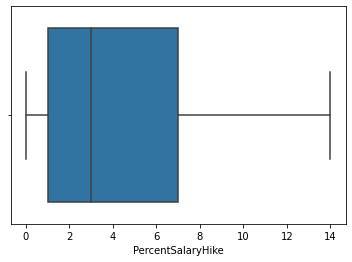

In [97]:
sns.boxplot(df3['PercentSalaryHike'])

<AxesSubplot:xlabel='PerformanceRating'>

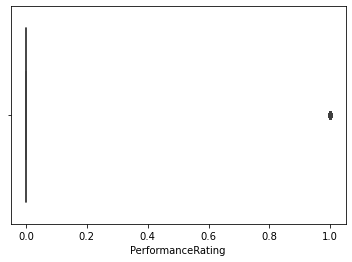

In [98]:
sns.boxplot(df3['PerformanceRating'])


<AxesSubplot:xlabel='RelationshipSatisfaction'>

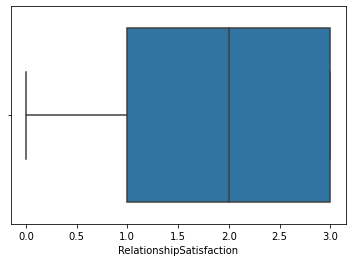

In [99]:
sns.boxplot(df3['RelationshipSatisfaction'])


<AxesSubplot:xlabel='StockOptionLevel'>

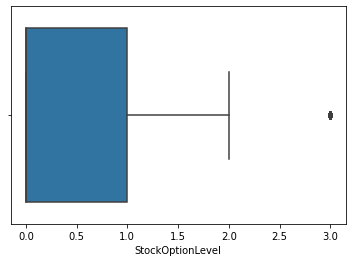

In [100]:
sns.boxplot(df3['StockOptionLevel'])

<AxesSubplot:xlabel='TotalWorkingYears'>

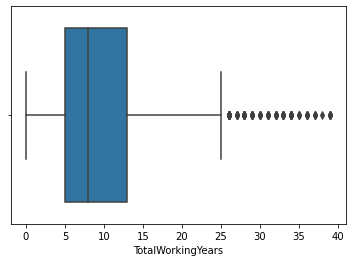

In [101]:
sns.boxplot(df3['TotalWorkingYears'])

<AxesSubplot:xlabel='TrainingTimesLastYear'>

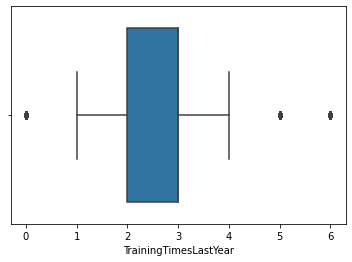

In [102]:
sns.boxplot(df3['TrainingTimesLastYear'])

<AxesSubplot:xlabel='WorkLifeBalance'>

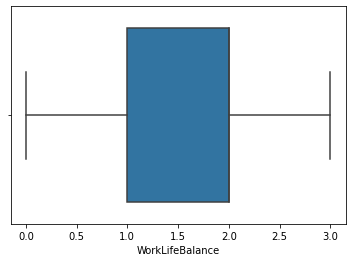

In [103]:
sns.boxplot(df3['WorkLifeBalance'])


<AxesSubplot:xlabel='YearsAtCompany'>

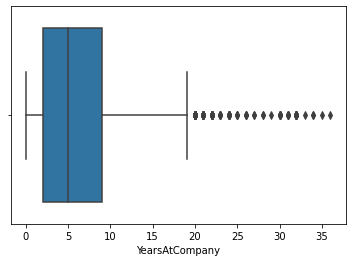

In [104]:
sns.boxplot(df3['YearsAtCompany'])

<AxesSubplot:xlabel='YearsInCurrentRole'>

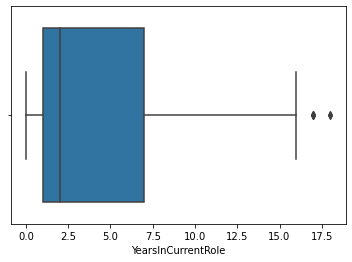

In [105]:
sns.boxplot(df3['YearsInCurrentRole'])


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

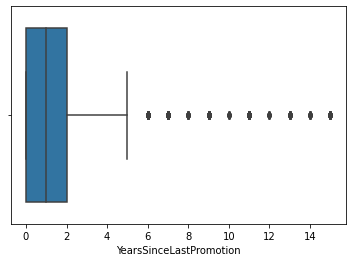

In [106]:
sns.boxplot(df3['YearsSinceLastPromotion'])


<AxesSubplot:xlabel='YearsWithCurrManager'>

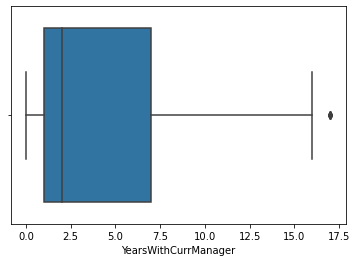

In [107]:
sns.boxplot(df3['YearsWithCurrManager'])

JobLevel,PerformanceRating,StockOptionLevel,TotalWorkingYears,
TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,
YearsWithCurrManager columns have outliers and these columns
skewness neds to be removed


In [108]:
df3.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,17.592457,0.500000,1.603406,1.285077,8.684104,1.895377,2.281833,1.627737,0.609895,1.641525,...,0.148418,1.657745,0.693025,10.141525,2.740876,1.714112,6.337794,3.721817,2.051906,3.658962
std,9.362508,0.500101,0.631214,0.549605,8.197187,1.008485,1.379821,1.125450,0.487873,0.749065,...,0.355586,1.095285,0.864119,7.648134,1.293363,0.747531,6.081583,3.517627,3.190589,3.481518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,5.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000
50%,16.000000,0.500000,2.000000,1.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,2.000000,0.000000,8.000000,3.000000,2.000000,5.000000,2.000000,1.000000,2.000000
75%,24.000000,1.000000,2.000000,2.000000,14.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,0.000000,3.000000,1.000000,13.000000,3.000000,2.000000,9.000000,7.000000,2.000000,7.000000
max,42.000000,1.000000,2.000000,2.000000,28.000000,4.000000,5.000000,3.000000,1.000000,3.000000,...,1.000000,3.000000,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


In [109]:
cor=df1.corr()
cor

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.029820,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.130016,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.039062,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
Department,-0.031882,0.063991,-0.009044,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.024586,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.008783,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.042438,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.002655,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.008278,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,0.017960,...,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599
JobInvolvement,0.029820,-0.130016,0.039062,-0.024586,0.008783,0.042438,-0.002655,-0.008278,0.017960,1.000000,...,-0.029071,0.034297,0.021523,-0.005603,-0.015338,-0.014617,-0.020785,0.008717,-0.024184,0.025976


<AxesSubplot:>

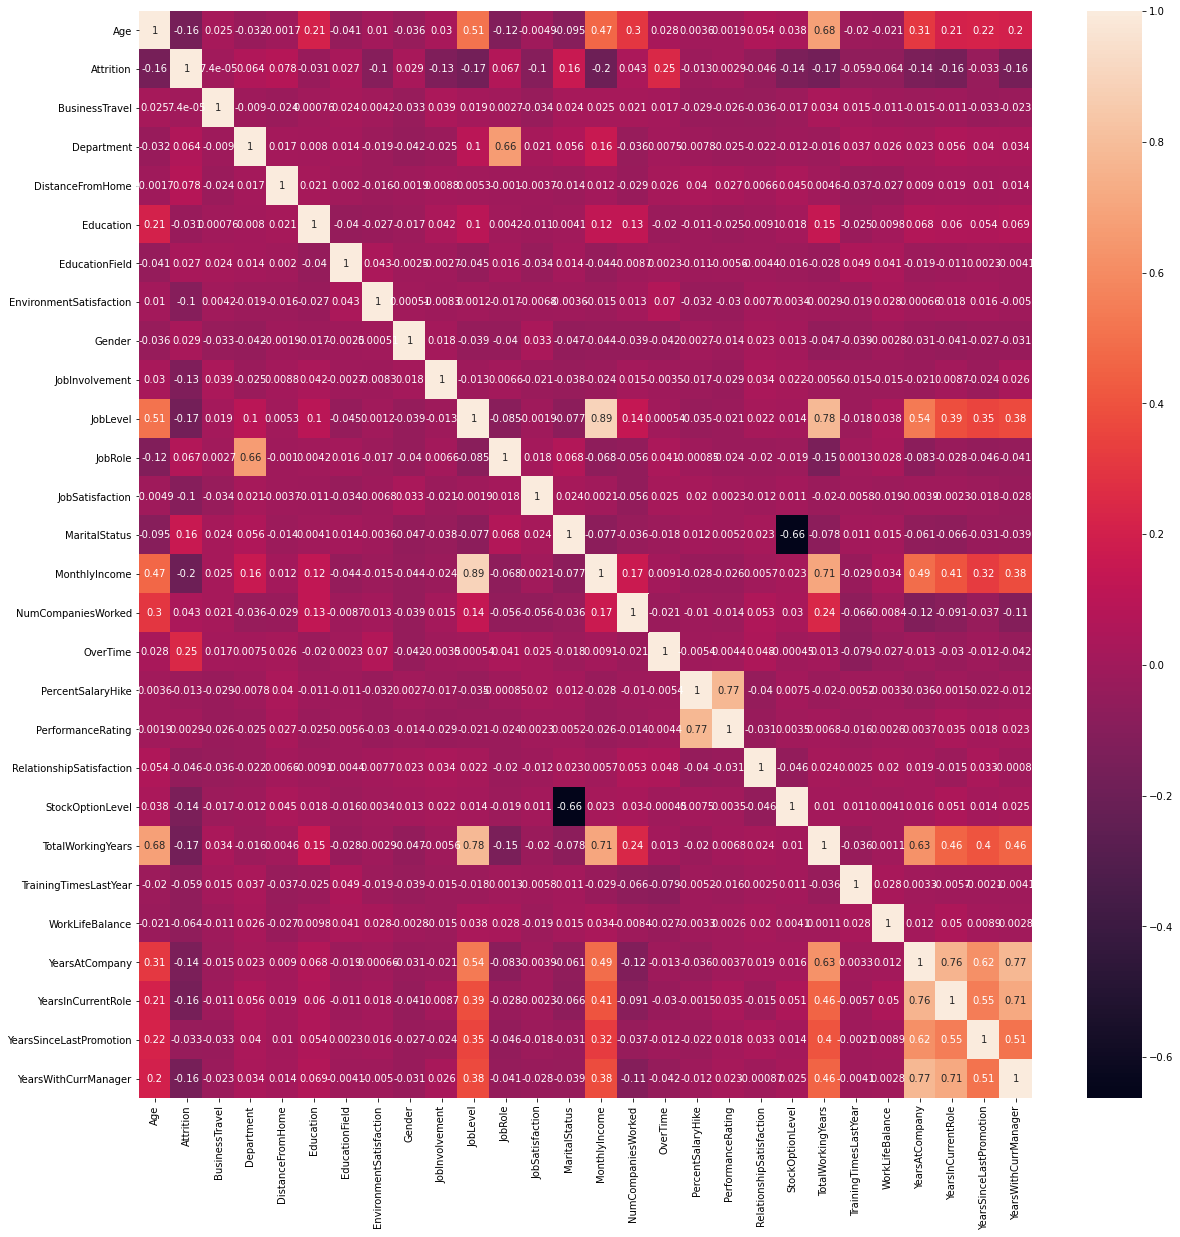

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='g')


As per analysis from diagram and problem

Job level and total working years are highly correlated.

Monthly Income and total working years are highly correlated.

Performance rating and percentage salary hike are highly correlated.

Years in current role and years at company are highly correlated.

Years with current manager and years at company are highly correlated.

# Removing Outliers¶


In [111]:
from scipy.stats import zscore

z=np.abs(zscore(df3))

df4=df3[(z<3).all(axis=1)]


In [112]:
df4.shape


(2337, 28)

In [113]:
df3.shape

(2466, 28)

Outlier removal calculation

2466-2340= 126
126/2466 = 5.11%

This is less than 8% so we can consider the removal of outliers

# Removing skewness

In [114]:
df4.skew()

Age                         0.537960
Attrition                  -0.028262
BusinessTravel             -1.324401
Department                  0.016527
DistanceFromHome            0.821344
Education                  -0.313230
EducationField              0.517144
EnvironmentSatisfaction    -0.201029
Gender                     -0.472502
JobInvolvement             -0.505640
JobLevel                    1.270345
JobRole                    -0.342786
JobSatisfaction            -0.243085
MaritalStatus              -0.365821
MonthlyIncome               0.265825
NumCompaniesWorked          0.971652
OverTime                    0.463227
PercentSalaryHike           0.830166
PerformanceRating           1.954850
RelationshipSatisfaction   -0.253939
StockOptionLevel            1.190433
TotalWorkingYears           1.043217
TrainingTimesLastYear       0.480533
WorkLifeBalance            -0.547830
YearsAtCompany              1.338551
YearsInCurrentRole          0.839265
YearsSinceLastPromotion     1.886413
Y

# Variance Inflation Factor to find multi collinearity¶


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [116]:
vif_data = pd.DataFrame()
vif_data["feature"] = df4.columns

In [117]:

vif_data["VIF"] = [variance_inflation_factor(df4.values, i)
                            for i in range(len(df4.columns))]
print(vif_data)

                     feature        VIF
0                        Age   8.738314
1                  Attrition   2.832925
2             BusinessTravel   6.668648
3                 Department  16.046281
4           DistanceFromHome   2.185599
5                  Education   4.633128
6             EducationField   3.823733
7    EnvironmentSatisfaction   3.106626
8                     Gender   2.626691
9             JobInvolvement   5.681523
10                  JobLevel  10.109168
11                   JobRole  10.069978
12           JobSatisfaction   3.182644
13             MaritalStatus   6.911146
14             MonthlyIncome  16.336073
15        NumCompaniesWorked   2.899106
16                  OverTime   1.892512
17         PercentSalaryHike   5.727082
18         PerformanceRating   3.052635
19  RelationshipSatisfaction   3.219783
20          StockOptionLevel   3.036162
21         TotalWorkingYears  11.901494
22     TrainingTimesLastYear   5.346985
23           WorkLifeBalance   5.991074


Department,MonthlyIncome,YearsAtCompany  have collinearity value more than 10
but these are important factors for attrition rate so not dropping them 

# Define Dependant and independent variable

In [118]:
x=df4.drop('Attrition',axis=1)
y=df4['Attrition']

# Scaling - Random state¶

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [120]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.9472934472934473 On random_state 1282


In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1)

# Normalisation

In [122]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.30952381 0.         0.5        ... 0.28571429 0.09090909 0.5       ]
 [0.52380952 1.         1.         ... 0.28571429 0.09090909 0.        ]
 [0.78571429 1.         1.         ... 0.5        0.09090909 0.        ]
 ...
 [0.52380952 1.         0.5        ... 0.28571429 0.09090909 0.        ]
 [0.35714286 1.         1.         ... 0.14285714 0.         0.21428571]
 [0.42857143 1.         0.5        ... 0.         0.         0.        ]]


In [123]:
print(new_xtest)

[[0.45238095 1.         0.5        ... 0.14285714 0.09090909 0.21428571]
 [0.19047619 0.5        0.5        ... 0.5        0.09090909 0.5       ]
 [0.11904762 1.         0.5        ... 0.         0.         0.        ]
 ...
 [0.54761905 1.         0.5        ... 0.14285714 0.         0.21428571]
 [0.19047619 0.5        0.5        ... 0.5        0.09090909 0.5       ]
 [0.28571429 1.         1.         ... 0.28571429 0.63636364 0.5       ]]


Use new_xtest and new_xtrain from now

# Models for Classification problem

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [125]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred=DTC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       339
           1       0.88      0.99      0.93       363

    accuracy                           0.92       702
   macro avg       0.93      0.92      0.92       702
weighted avg       0.93      0.92      0.92       702



In [126]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred=RFC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       339
           1       0.96      1.00      0.98       363

    accuracy                           0.98       702
   macro avg       0.98      0.98      0.98       702
weighted avg       0.98      0.98      0.98       702



In [127]:

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(new_xtrain, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [128]:
y_pred= classifier.predict(new_xtest)

In [129]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred=SV.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       339
           1       0.87      0.83      0.85       363

    accuracy                           0.85       702
   macro avg       0.85      0.85      0.85       702
weighted avg       0.85      0.85      0.85       702



In [130]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
GBCpred = GBC.predict(new_xtest)
gbc=classification_report(y_test,GBCpred)
print(gbc)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       339
           1       0.88      0.89      0.89       363

    accuracy                           0.88       702
   macro avg       0.88      0.88      0.88       702
weighted avg       0.88      0.88      0.88       702



# Cross Validation Score Calculation

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9191227877523381


In [133]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9751834770036055


In [134]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.6217482018338549


In [135]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.8887351525467156



Difference between Model Accuracy and Cross Validation score

DTC= 92-92.5 = -0.5

RFC= 97-96.95 = 0.05

SV= 86-62 = 24

GBC= 88-88.25 = -0.25

Random Forest Classifier has least difference also has highest accuracy hence we can consider the same 

# Hyper Parameter Tuning

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [137]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000013250940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001323BB50>})

In [138]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.959771408700745



RandomizedSearchCV gives the best score which behaves the same in most of the cases as it goes through only a fixed number of
hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. 
This approach reduces unnecessary computation

# Predictions

In [139]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1]
[0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1]


Predicted and true values are same

First row is predicted value

second row is actual value

# Final Model Creation

In [140]:
Final_mod = RandomForestClassifier(criterion= 'entropy', max_depth = None, max_features= 3, min_samples_leaf = 3)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

95.86894586894587


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [142]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)


AUC: 0.979


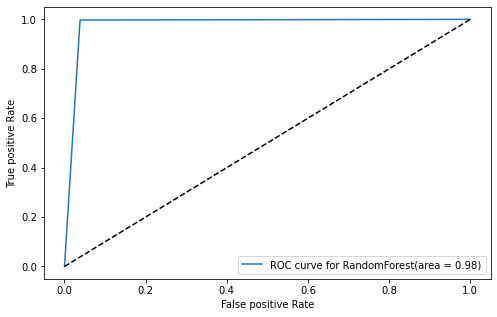

In [143]:
#plot
#plt.clf()
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

# Confusion Matrix

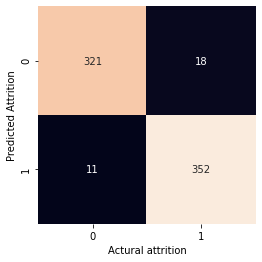

In [144]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural attrition')
plt.ylabel('Predicted Attrition');

326+334 =660 Correct predictions 
17+25= 43 Incorrect predictions 


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       339
           1       0.95      0.97      0.96       363

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702



*The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 

The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

In [146]:
# Saving The Best Model

In [147]:
import joblib
joblib.dump(Final_mod,"HR_Analytics_Project .pkl")


['HR_Analytics_Project .pkl']